In [20]:
import pandas as pd

In [21]:
df=pd.read_csv("Admission_Predict.csv")

In [22]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [23]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [24]:
for i in range(len(df)):
     if df.at[i, "Chance of Admit "] >= 0.75:
        df.at[i, "Chance of Admit "] = 1
     else:
        df.at[i, "Chance of Admit "] = 0

In [25]:
 df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [26]:
 df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [32]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 
        'SOP', 'LOR ' , 'CGPA', 'Research']]
Y = df[['Chance of Admit ']]



In [33]:
 from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [34]:
 X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3)
Model=DecisionTreeClassifier(criterion='entropy')


In [36]:
Model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
 Y_pred=Model.predict(X_test)


In [38]:
 from sklearn.metrics import classification_report


In [39]:
 print('', classification_report(Y_test, Y_pred))


               precision    recall  f1-score   support

         0.0       0.84      0.83      0.84        65
         1.0       0.80      0.82      0.81        55

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.83      0.82      0.83       120



In [42]:
import matplotlib.pyplot as plt


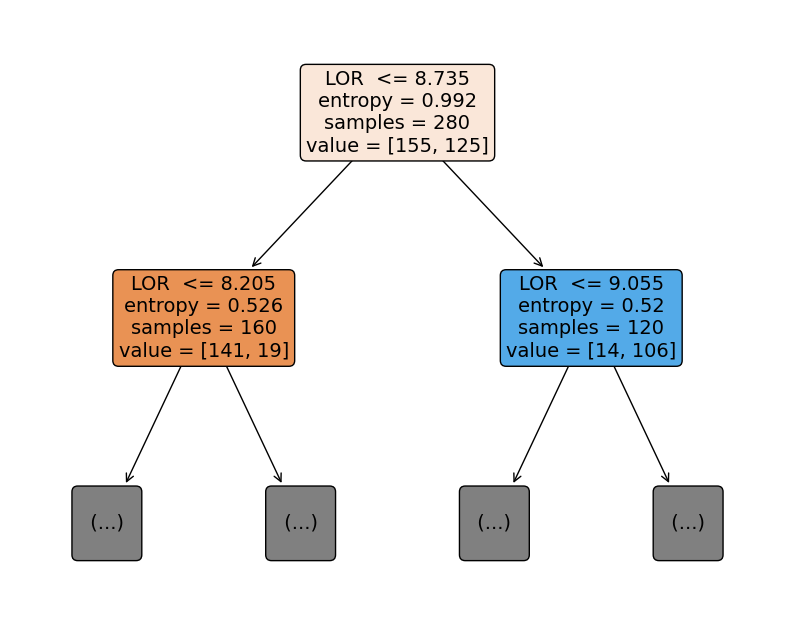

In [43]:
plt.figure(figsize=(10, 8))
plot_tree(Model, filled=True, feature_names=df.columns,max_depth=1,rounded=True)
plt.show()